### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Styling helpers

I found out about the color class from this [Stack Overflow question](https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python) (thanks [Boubakr](https://stackoverflow.com/users/1770999/boubakr)!)

In [20]:
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    fig = sns.barplot(data.values, data.index, ax=ax)
    for i, v in enumerate(data.values):
        if int_text:
            ax.text(0.8,i,int(v),color='k',fontsize=14)
        else:
            ax.text(0.8,i,v,color='k',fontsize=14)
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)
    
### Used to style Python print statements
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Load data

In [3]:
census = pd.read_csv("../../data/census/census_county.csv")

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (3220, 37)
Columns Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


### The million and one dollar question... How many states are there?

In [ ]:
len(census.groupby("State"))

### Less exciting, how many counties are there?

In [5]:
len(census.groupby(["State", "County"]))

3220

### Can two states have the same county name?

The answer is a resounding yes

In [6]:
dup_counties = census.groupby("County").apply(len).sort_values(ascending=False)
dup_counties.where(dup_counties > 1).dropna()

County
Washington    31.0
Jefferson     26.0
Franklin      25.0
Jackson       24.0
Lincoln       24.0
Madison       20.0
Clay          18.0
Union         18.0
Montgomery    18.0
Marion        17.0
Monroe        17.0
Wayne         16.0
Grant         15.0
Warren        14.0
Greene        14.0
Carroll       13.0
Polk          12.0
Johnson       12.0
Lake          12.0
Douglas       12.0
Lee           12.0
Adams         12.0
Clark         12.0
Marshall      12.0
Morgan        11.0
Crawford      11.0
Scott         11.0
Fayette       11.0
Lawrence      11.0
Calhoun       11.0
              ... 
Sumner         2.0
Harlan         2.0
Steele         2.0
Bradford       2.0
Surry          2.0
Barton         2.0
Barry          2.0
Boyd           2.0
Beaufort       2.0
Leon           2.0
Stanton        2.0
Brooks         2.0
Gloucester     2.0
Bath           2.0
Hale           2.0
Hampshire      2.0
Tipton         2.0
Trinity        2.0
Halifax        2.0
Bibb           2.0
Baldwin        2.0
Gilme

### Number of counties in a State

count     52.000000
mean      61.923077
std       46.357454
min        1.000000
25%       23.750000
50%       63.000000
75%       87.250000
max      254.000000
Name: County, dtype: float64

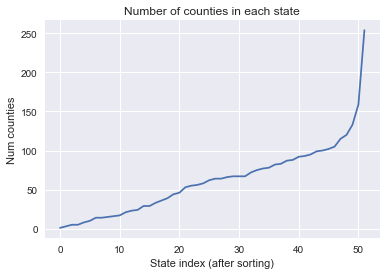

In [7]:
counties_per_state = census.groupby("State").County.agg(len)
plt.plot(sorted(counties_per_state.values))
plt.ylabel("Num counties")
plt.xlabel("State index (after sorting)")
plt.title("Number of counties in each state")
counties_per_state.describe()

### Total population by state

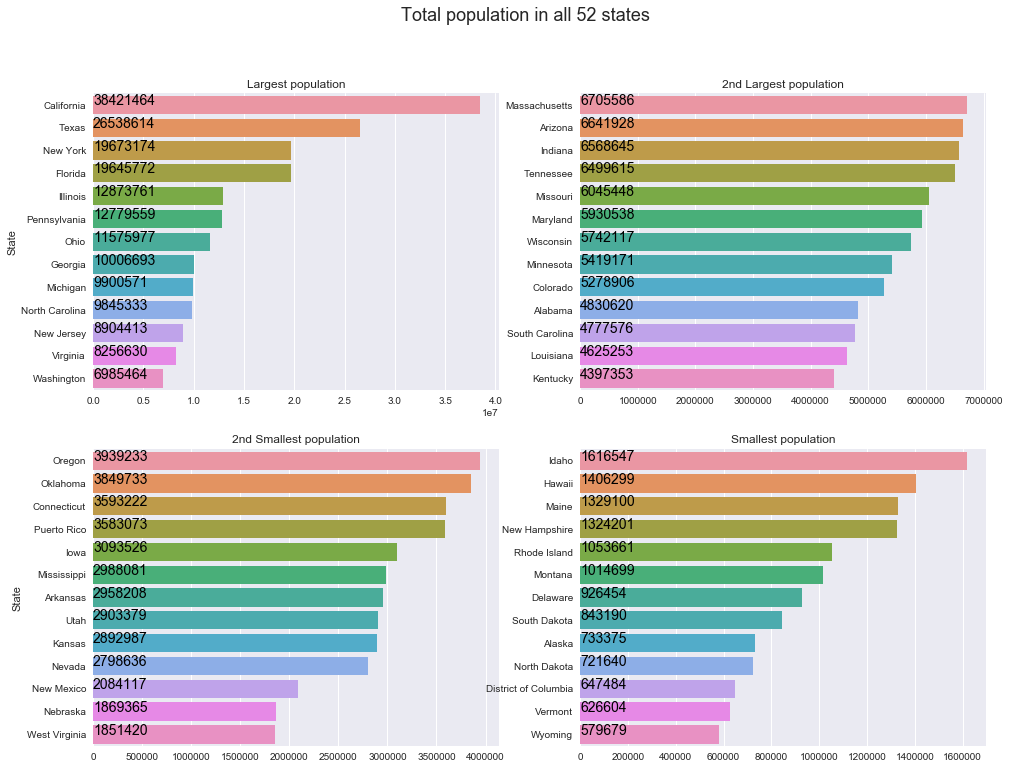

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Total population in all 52 states", fontsize=18)

state_pops = census.groupby("State")["TotalPop"].sum().sort_values(ascending=False)

pretty_bar(state_pops.head(13), axarr[0][0], title="Largest population")
pretty_bar(state_pops.iloc[13:26], axarr[0][1], title="2nd Largest population", ylabel="")
pretty_bar(state_pops.iloc[26:39], axarr[1][0], title="2nd Smallest population")
pretty_bar(state_pops.tail(13), axarr[1][1], title="Smallest population", ylabel="")

### Population in Counties

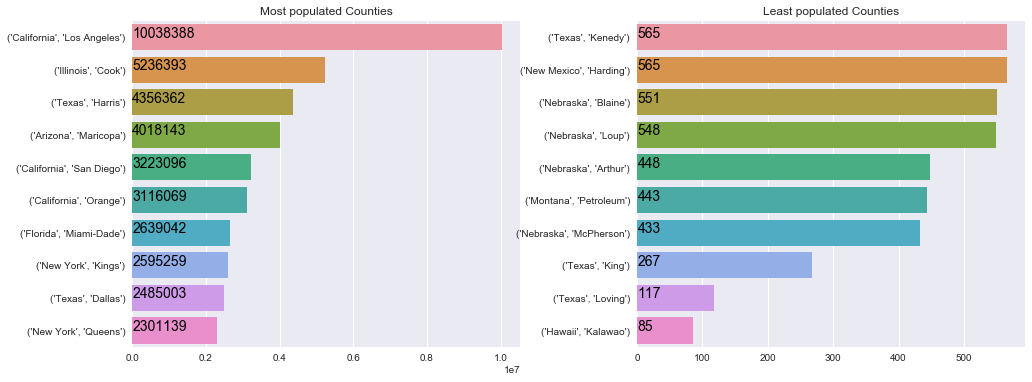

In [9]:
fig, axarr = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(wspace=0.3)

county_pop = census.groupby(["State", "County"]).TotalPop.median().sort_values(ascending=False)

pretty_bar(county_pop.head(10), axarr[0], title="Most populated Counties")
pretty_bar(county_pop.tail(10), axarr[1], title="Least populated Counties")

### Income in Counties

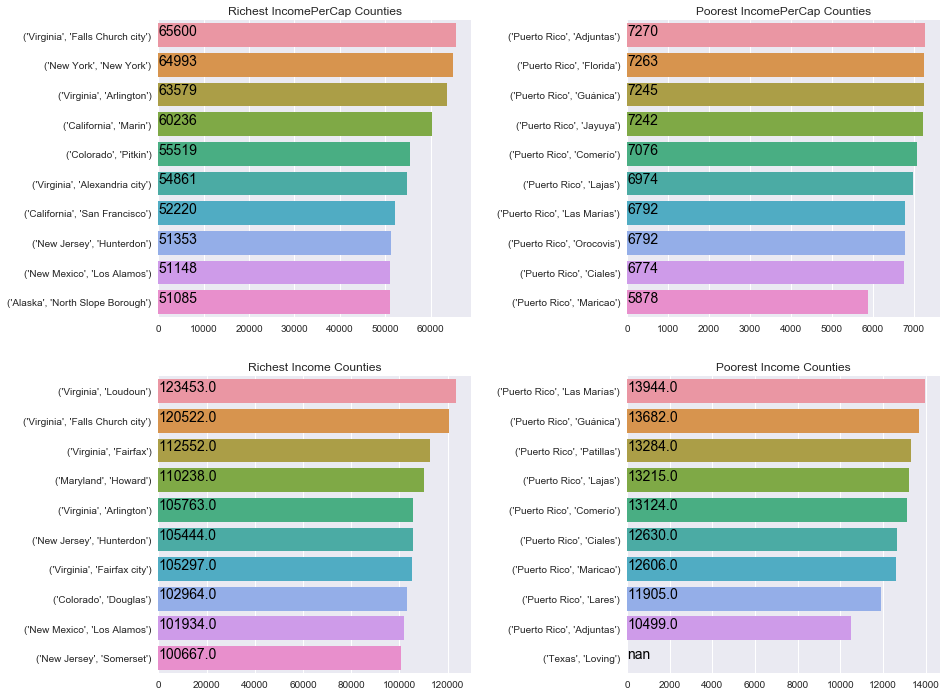

In [10]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

county_income_per_cap = census.groupby(["State", "County"])["IncomePerCap"].median().sort_values(ascending=False)
county_income = census.groupby(["State", "County"])["Income"].median().sort_values(ascending=False)

pretty_bar(county_income_per_cap.head(10), axarr[0][0], title="Richest IncomePerCap Counties")
pretty_bar(county_income_per_cap.tail(10), axarr[0][1], title="Poorest IncomePerCap Counties", ylabel="")

pretty_bar(county_income.head(10), axarr[1][0], title="Richest Income Counties")
pretty_bar(county_income.tail(10), axarr[1][1], title="Poorest Income Counties", ylabel="")

### Poverty by County

I think there are some issues I have before I look at the poverty per state.

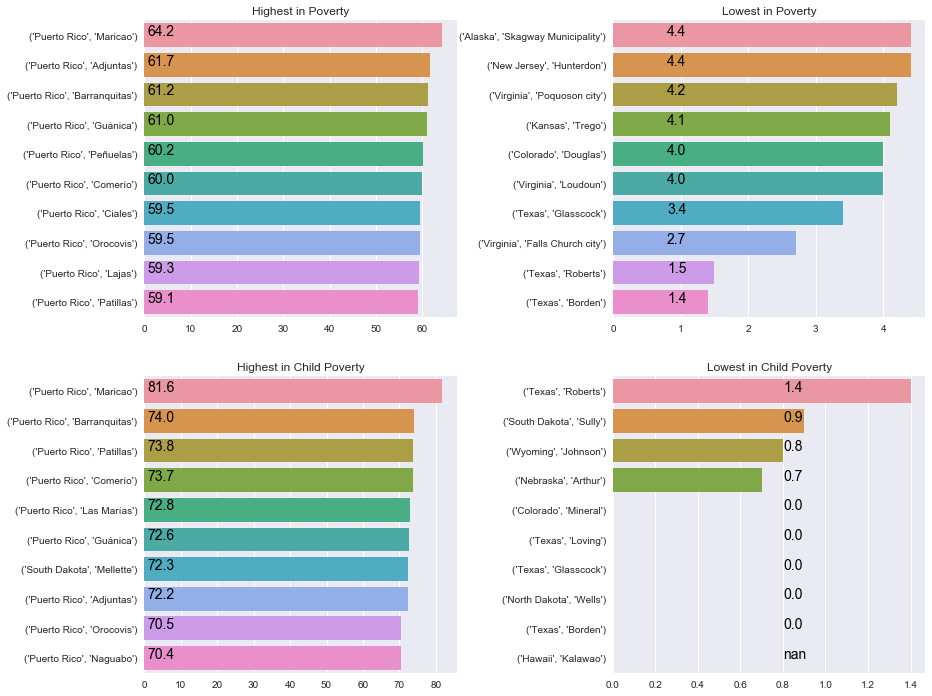

In [11]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

poverty = census.groupby(["State", "County"])["Poverty"].median().sort_values(ascending=False)
child_poverty = census.groupby(["State", "County"])["ChildPoverty"].median().sort_values(ascending=False)

pretty_bar(poverty.head(10), axarr[0][0], title="Highest in Poverty")
pretty_bar(poverty.tail(10), axarr[0][1], title="Lowest in Poverty", ylabel="")

pretty_bar(child_poverty.head(10), axarr[1][0], title="Highest in Child Poverty")
pretty_bar(child_poverty.tail(10), axarr[1][1], title="Lowest in Child Poverty", ylabel="")

### Transportation by State

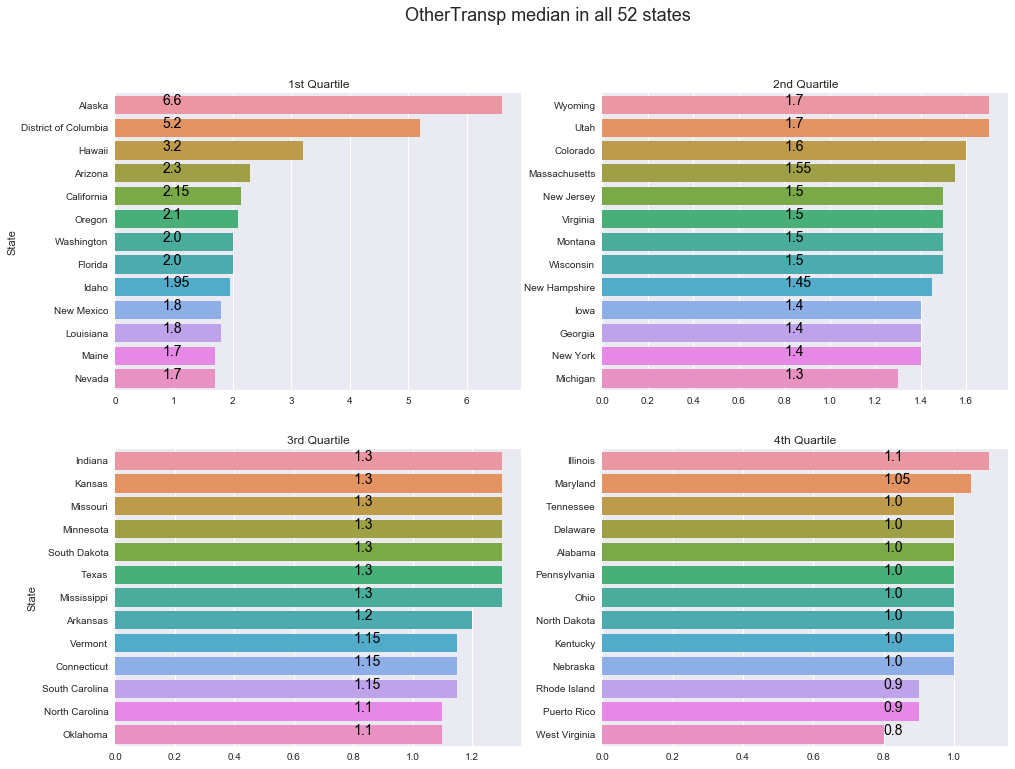

In [12]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

transportation = transportations[-1]

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("{} median in all 52 states".format(transportation), fontsize=18)

trans_pops = census.groupby(["State"])[transportation].median().sort_values(ascending=False)

pretty_bar(trans_pops.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(trans_pops.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(trans_pops.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(trans_pops.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

### Transportation by County

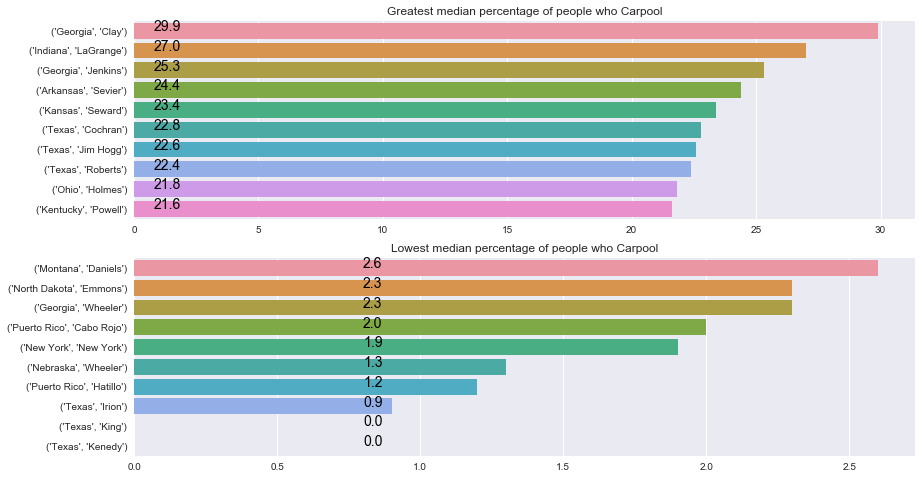

In [13]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

transportation = transportations[1]

fig, axarr = plt.subplots(2, 1, figsize=(14, 8))
fig.subplots_adjust(wspace=0.5)

trans_pops = census.groupby(["State", "County"])[transportation].median().sort_values(ascending=False)

pretty_bar(trans_pops.head(10), axarr[0], title="Greatest median percentage of people who {}".format(transportation))
pretty_bar(trans_pops.tail(10), axarr[1], title="Lowest median percentage of people who {}".format(transportation))

### Unemployment by State

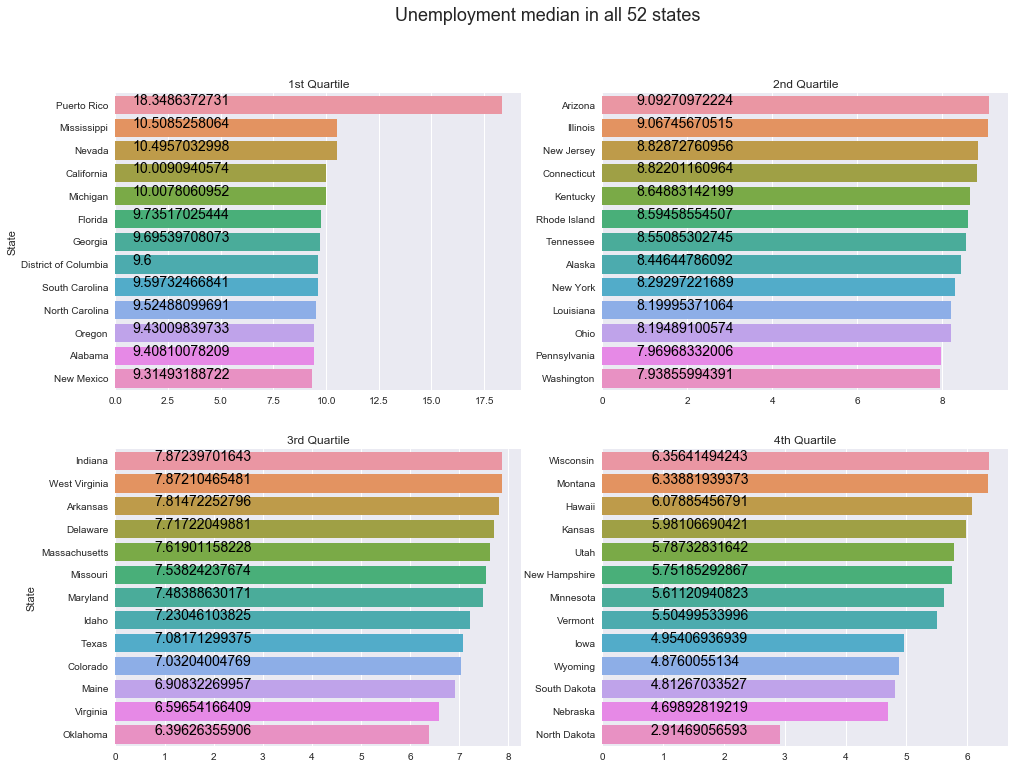

In [14]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Unemployment median in all 52 states", fontsize=18)

census["Tot_Unemployment"] = census.Unemployment * census.TotalPop
unemployment = census.groupby("State").Tot_Unemployment.sum() / census.groupby("State").TotalPop.sum()
unemployment = unemployment.sort_values(ascending=False)

pretty_bar(unemployment.head(13), axarr[0][0], title="1st Quartile")
pretty_bar(unemployment.iloc[13:26], axarr[0][1], title="2nd Quartile", ylabel="")
pretty_bar(unemployment.iloc[26:39], axarr[1][0], title="3rd Quartile")
pretty_bar(unemployment.tail(13), axarr[1][1], title="4th Quartile", ylabel="")

### Unemployment by County

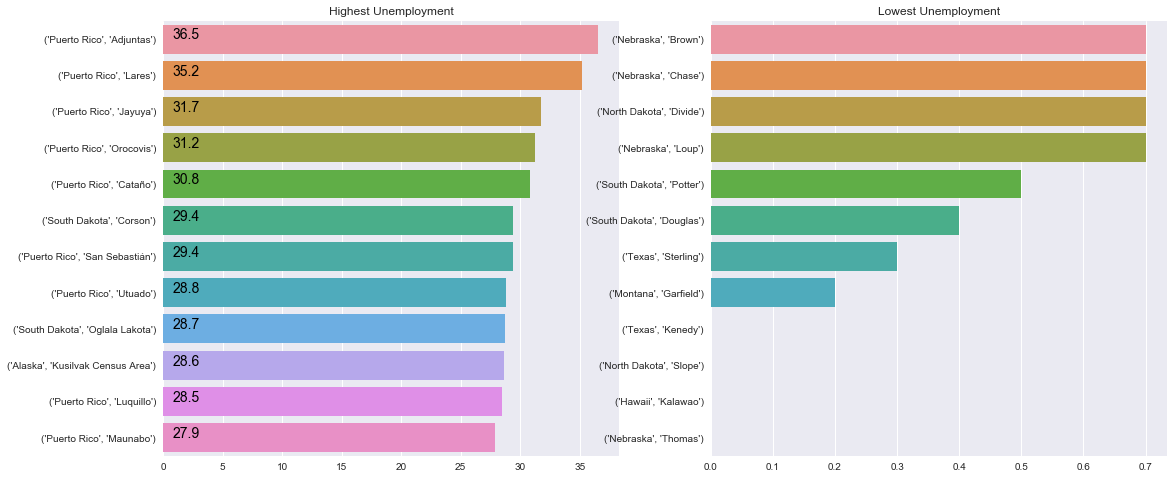

In [15]:
fig, axarr = plt.subplots(1, 2, figsize=(18,8))
fig.subplots_adjust(hspace=0.8)

unemployment = census.groupby(["State", "County"])["Unemployment"].median().sort_values(ascending=False)

pretty_bar(unemployment.head(12), axarr[0], title="Highest Unemployment")

### The text values are placed oddly here so I do a normal seaborn barplot
data = unemployment.tail(12)
_ = sns.barplot(x=data.values, y=data.index, ax=axarr[1]).set(title="Lowest Unemployment", ylabel="")

### Commute time

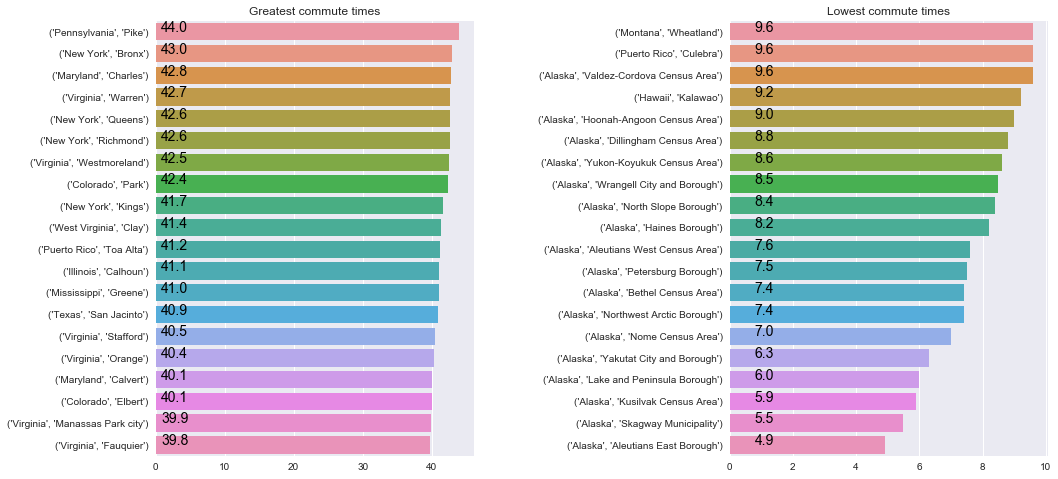

In [16]:
fig, axarr = plt.subplots(1, 2, figsize=(16, 8))
fig.subplots_adjust(wspace=0.8)

commute = census.groupby(["State", "County"])["MeanCommute"].median().sort_values(ascending=False)

pretty_bar(commute.head(20), axarr[0], title="Greatest commute times")
pretty_bar(commute.tail(20), axarr[1], title="Lowest commute times")

### Work type by County

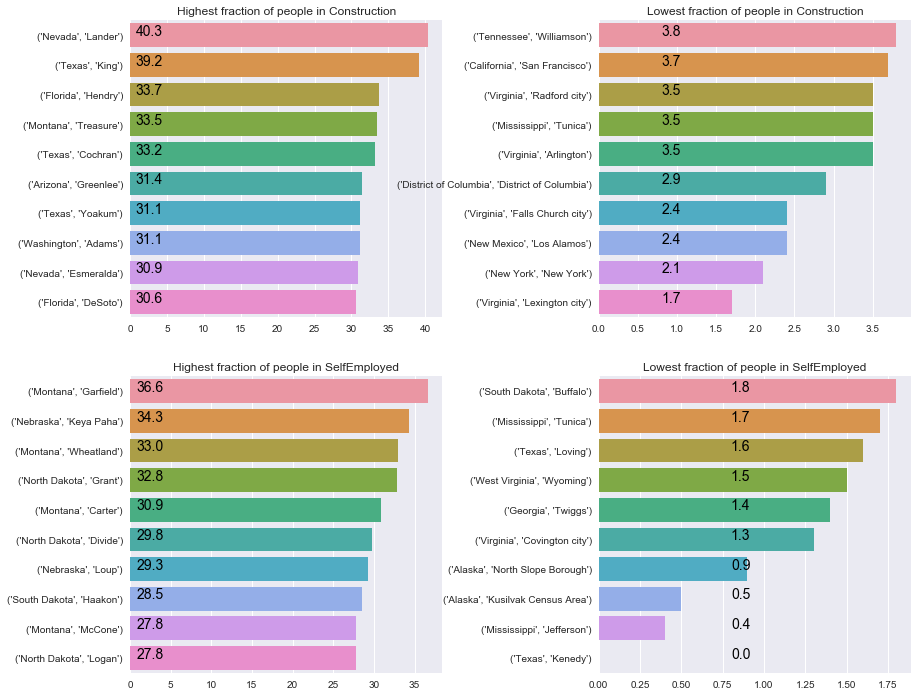

In [19]:
careers = ['Professional', 'Service', 'Office', 'Construction', 'Production']
sectors = ['PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork']

career = careers[3]
sector = sectors[2]

fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(wspace=0.5)

car = census.groupby(["State", "County"])[career].median().sort_values(ascending=False)
sec = census.groupby(["State", "County"])[sector].median().sort_values(ascending=False)

pretty_bar(car.head(10), axarr[0][0], title="Highest fraction of people in {}".format(career))
pretty_bar(car.tail(10), axarr[0][1], title="Lowest fraction of people in {}".format(career), ylabel="")

pretty_bar(sec.head(10), axarr[1][0], title="Highest fraction of people in {}".format(sector))
pretty_bar(sec.tail(10), axarr[1][1], title="Lowest fraction of people in {}".format(sector), ylabel="")